<a href="https://colab.research.google.com/github/Sumaiya2000/Mobile-Price-Classification-using-Machine-learning/blob/main/Mobile_price_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mobile Price Classification

Description: From this dataset, we will take features of a phone such as battery power, bluetooth availability, clock speed of the microprocessor of the phones as input features and we will predict the price range of the phone as the output. Different features will impact the price range of different phones. The features in the dataset has minimum correlation between each other, so not one particular input feature will effect the entire classification. 

Dataset: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?select=train.csv

Drive: https://drive.google.com/drive/folders/1fcnYjpvalc6N2_TOwsB5HzF4SeLU5AA6



Dataset Read

battery_power: Total energy a battery can store in one time measured in mAh

blue: Has bluetooth or not with value of 0(no bluetooth), 1(has bluetooth)

clock_speed: speed at which microprocessor executes instructions

dual_sim: Has dual sim support or not with value of 0(not supported), 1(has dual sim)

fc: Front Camera mega pixels

four_g: Has 4G or not with value of 0(not), 1(has 4g)

int_memory: Internal Memory in Gigabytes

m_dep: Mobile Depth in cm

mobile_wt: Weight of mobile phone

n_cores: Number of cores of processor

pc: Primary Camera mega pixels

px_height: Pixel Resolution Height

px_width: Pixel Resolution Width

ram: Random Access Memory in Mega Bytes

sc_h: Screen Height of mobile in cm

sc_w: Screen Width of mobile in cm

talk_time: longest time that a single battery charge will last when you are

three_g: Has 3G or not with value of 0(not), 1(has 3g)

touch_screen: Has touch screen or not with with value of 0(not), 1(has touch 
screen)

wifi: Has wifi or not with value of 0(no wifi), 1(has wifi)

price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles
import statistics
from sklearn.metrics import accuracy_score

In [ ]:
dset=pd.read_csv("/content/drive/MyDrive/422 project/Mobile_price_range.csv")
dset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
print(dset.keys())

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [ ]:
dset.shape

(2000, 21)

In [ ]:
dset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
dset.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
print(dset.dtypes)

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object


In [ ]:
dset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Dataset Preprocessing

In [ ]:
dset.keys()

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Renaming features

In [ ]:
dset.rename(columns = {'blue':'bluetooth','four_g':'fourG','m_dep':'depth','mobile_wt':'weight','n_cores':'core','three_g':'threeG'}, inplace = True)
dset.keys()

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'fc', 'fourG',
       'int_memory', 'depth', 'weight', 'core', 'pc', 'px_height', 'px_width',
       'ram', 'sc_h', 'sc_w', 'talk_time', 'threeG', 'touch_screen', 'wifi',
       'price_range'],
      dtype='object')

In [ ]:
dset.head()

,battery_power,bluetooth,clock_speed,dual_sim,fc,fourG,int_memory,depth,weight,core,...,px_height,px_width,ram,sc_h,sc_w,talk_time,threeG,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Feature engineering

Encoding categorical variables

In [ ]:
dset.threeG.value_counts()

1    1523
0     477
Name: threeG, dtype: int64

In [ ]:
dset.bluetooth.value_counts()

0    1010
1     990
Name: bluetooth, dtype: int64

In [ ]:
dset.fourG.value_counts()

1    1043
0     957
Name: fourG, dtype: int64

In [ ]:
dset.dual_sim.value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

In [ ]:
dset.touch_screen.value_counts()

1    1006
0     994
Name: touch_screen, dtype: int64

If categorical features were not labeled

In [ ]:
# dset['bluetooth'] = dset['bluetooth'].map({'Yes':1,'No':0}) 

for mapping all yes and no values to 1 and 0

In [ ]:
# dset.replace('Yes|yes|YES',1,inplace=True,regex=True)
# dset.replace('No|no|NO',0,inplace=True,regex=True)

Feature Selection if we had any irrelevant features

In [ ]:
# dset=dset.drop('pid',axis=1)

Checking for null values

In [ ]:
dset.isnull().sum()

battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
fc               0
fourG            0
int_memory       0
depth            0
weight           0
core             0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
threeG           0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Imputing missing values if existed

for categorical features

In [ ]:
# from sklearn.impute import SimpleImputer
# value=dset.bluetooth.value_counts().keys()[0] #this will give me the value with the highest count
# impute = SimpleImputer(missing_values=np.nan, strategy="constant",fill_value=value) #imputing null values with the value with the highest count for categorical features
# impute.fit(dset[['bluetooth']])
# dset['bluetooth'] = impute.transform(dset[['bluetooth']])

for continuous values

In [ ]:
# from sklearn.impute import SimpleImputer
# impute = SimpleImputer(missing_values=np.nan, strategy='mean')
# impute.fit(dset[['depth']])
# dset['depth'] = impute.transform(dset[['depth']])

Checking for correlated features

In [ ]:
dset.keys()

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'fc', 'fourG',
       'int_memory', 'depth', 'weight', 'core', 'pc', 'px_height', 'px_width',
       'ram', 'sc_h', 'sc_w', 'talk_time', 'threeG', 'touch_screen', 'wifi',
       'price_range'],
      dtype='object')

In [ ]:
cdset=pd.DataFrame(dset,columns=['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'fc', 'fourG',
       'int_memory', 'depth', 'weight', 'core', 'pc', 'px_height', 'px_width',
       'ram', 'sc_h', 'sc_w', 'talk_time', 'threeG', 'touch_screen', 'wifi'])
cr=cdset.corr()
cr

,battery_power,bluetooth,clock_speed,dual_sim,fc,fourG,int_memory,depth,weight,core,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,threeG,touch_screen,wifi
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343
bluetooth,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085
fourG,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993
depth,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353
weight,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409
core,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964


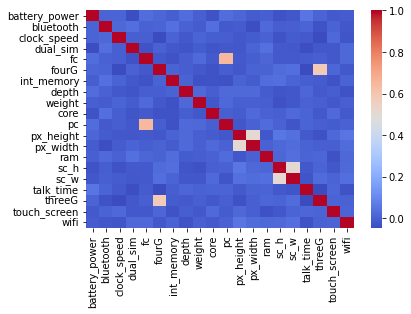

In [ ]:
import seaborn as sns
sns.heatmap(cr, cmap = 'coolwarm')

Dividing dataset into training and testing data

In [ ]:
x=dset.drop(['price_range'],axis=1)
y=dset['price_range']

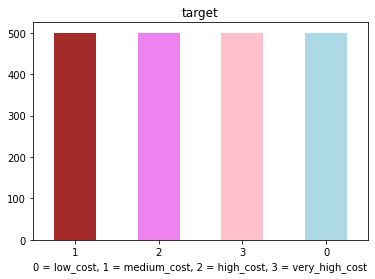

In [ ]:
# Visualize the feature of prediction
y.value_counts().plot(kind="bar", color=["brown",'violet','pink' ,"lightblue"], title="target")
plt.xticks(rotation=0)
plt.xlabel("0 = low_cost, 1 = medium_cost, 2 = high_cost, 3 = very_high_cost");

In [ ]:
from sklearn.model_selection import train_test_split
#random data splitting
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state=1)

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1500, 20)
y_train shape: (1500,)
X_test shape: (500, 20)
y_test shape: (500,)


Train and Test 
Visualization

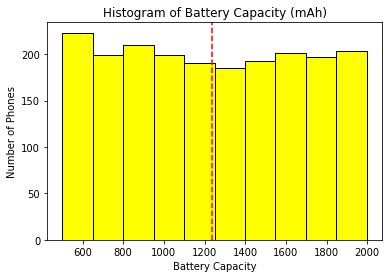

In [ ]:
vis = dset.battery_power
plt.hist(vis,color = "yellow", ec="black",histtype="barstacked")
m = statistics.mean(vis)
plt.axvline(m, color = "red", linestyle = "dashed")
plt.title('Histogram of Battery Capacity (mAh)')
plt.xlabel('Battery Capacity')
plt.ylabel('Number of Phones')
plt.show()

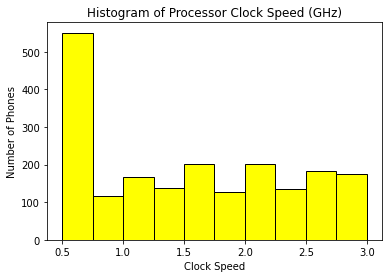

In [ ]:
vis = dset.clock_speed
plt.hist(vis,color = "yellow", ec="black",histtype="barstacked")
plt.title('Histogram of Processor Clock Speed (GHz)')
plt.xlabel('Clock Speed')
plt.ylabel('Number of Phones')
plt.show()

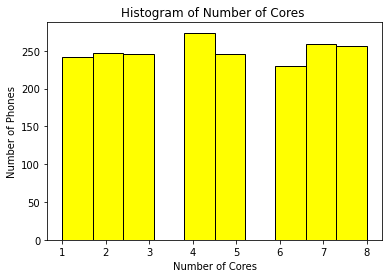

In [ ]:
vis = dset.core
from matplotlib import pyplot as plt
plt.hist(vis,color = "yellow", ec="black",histtype="barstacked")
plt.title('Histogram of Number of Cores ')
plt.xlabel('Number of Cores')
plt.ylabel('Number of Phones')
plt.show()

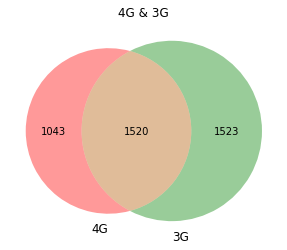

In [ ]:
d1 = dset['fourG'].value_counts()[1]
d2 = dset['threeG'].value_counts()[1]
dset["4&3"] = dset["fourG"] == dset["threeG"]
d3 = dset['4&3'].value_counts()[True]

v = venn2(subsets=(d1,d2,d3), set_labels = ("4G","3G"))
v.get_label_by_id('100').set_text(d1)
v.get_label_by_id('010').set_text(d2)
plt.title("4G & 3G")
plt.show()

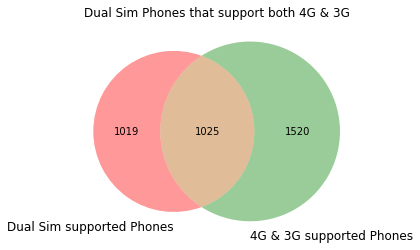

In [ ]:
d1 = dset['dual_sim'].value_counts()[1]
d2 = dset['4&3'].value_counts()[1]
dset["test"] = dset["dual_sim"] == dset["4&3"]
d3 = dset['test'].value_counts()[True]
v = venn2(subsets=(d1,d2,d3), set_labels = ("Dual Sim supported Phones","4G & 3G supported Phones"))
v.get_label_by_id('100').set_text(d1)
v.get_label_by_id('010').set_text(d2)
plt.title("Dual Sim Phones that support both 4G & 3G")
plt.show()

Modelling

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(X_train, y_train)

print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

Test set accuracy: 0.91


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(7)
knn_grid = {"n_neighbors": np.arange(10,25,1),
          }

knnparam = RandomizedSearchCV(KNeighborsClassifier(),
                           param_distributions=knn_grid,
                           cv=4,
                           n_iter=10,
                           verbose=True)

knnparam.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])},
                   verbose=True)

In [ ]:
knnparam.best_params_

{'n_neighbors': 11}

In [ ]:
knnparam.score(X_test, y_test)

0.918

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train, y_train)

print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

Test set accuracy: 0.92


Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(8)
rf=RandomForestClassifier(max_depth= 6,
                          min_samples_leaf= 5,
                          min_samples_split= 9,
                          n_estimators = 90)

rf.fit(X_train, y_train)

print("Test set accuracy: {:.2f}".format(rf.score(X_test, y_test)))

Test set accuracy: 0.83


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(7)
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

rfparam = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=4,
                           n_iter=20,
                           verbose=True)

rfparam.fit(X_train, y_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
rfparam.best_params_

{'n_estimators': 960,
 'min_samples_split': 12,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [ ]:
rfparam.score(X_test, y_test)

0.856

In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(10)
rf=RandomForestClassifier(max_depth= 10,
                          min_samples_leaf= 3,
                          min_samples_split= 12,
                          n_estimators = 960)

rf.fit(X_train, y_train)

print("Test set accuracy: {:.2f}".format(rf.score(X_test, y_test)))

Test set accuracy: 0.87


SVC

In [ ]:
from sklearn.svm import SVC
svc=SVC(C=1,kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
accuracy_score(y_test,y_pred)

0.958

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(9)
svc_grid = {'kernel': ['linear','rbf','poly'],
          'gamma': [0.01,0.07,0.1, 0.13,0.17,0.2, 0.3],
           'C': [1, 10, 100, 1000]}

svcparam = RandomizedSearchCV(SVC(),
                           param_distributions=svc_grid,
                           cv=4,
                           n_iter=20,
                           verbose=True)

svcparam.fit(X_train, y_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


RandomizedSearchCV(cv=4, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [1, 10, 100, 1000],
                                        'gamma': [0.01, 0.07, 0.1, 0.13, 0.17,
                                                  0.2, 0.3],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   verbose=True)

In [ ]:
svcparam.best_params_

{'kernel': 'linear', 'gamma': 0.2, 'C': 100}

In [ ]:
svcparam.score(X_test, y_test)

0.96

In [ ]:
classifier = SVC(C=100,kernel = 'linear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('Test accuracy:',accuracy_score(y_test,y_pred)*100,'%')

Test accuracy: 96.0 %
